# ***"Detección de Señales Macroeconómicas en el S&P 500 mediante el Spread  10Y-2Y"***
---





*   Eugenio Hernandez
*   Diego Dueñas
*   Santiago Nava



# **INTRODUCCIÓN**

## Objetivos

### Generales
Determinar la capacidad explicativa y predictiva del diferencial de tasas de interés americanas (Spread 10Y-2Y) sobre los retornos  del S&P 500 en terminos medio-placistas, utilizando distintas estratgias de regresión lineal y polinomial con técnicas para identificar señales de mercado.

### Específicos
- **Consolidación de Datos Financieros:** Construir un dataset alineado temporalmente que integre datos diarios del mercado de bonos (T10Y2Y) y renta variable (S&P 500), gestionando los desfaces
 de fechas por feriados bursátiles y bancarios.

- **Análisis Exploratorio**: Determinar la correlación  entre la curva de tipos (Spread) y el rendimiento del mercado.

- **Modelado Comparativo**: Desarrollar y entrenar tres configuraciones de modelos (Lineal Simple, Polinomial e Interacciones) para capturar tanto relaciones directas como no lineales.

- **Optimización por Regularización**: Aplicar y comparar técnicas de penalización (Ridge, Lasso y ElasticNet) para reducir el sobreajuste (overfitting) y aislar la importancia real del Spread como predictor frente al ruido del mercado.

- **Evaluación de Desempeño**: Validar la eficacia de los modelos mediante métricas de error ($R^2$, MSE) y análisis de significancia de los coeficientes.

---


## Marco teórico

*  **Regresión lineal:** Su objetivo es modelar la relación lineal entre una variable dependiente (en este caso, los retornos diarios del S&P 500) y una o más variables independientes (Spread 10Y-2Y).
$$Y = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n + \epsilon$$
Donde los coeficientes $\beta$ representan la sensibilidad del mercado ante cambios en la curva de tipos.

*   **Regresión polinomial**:  Los mercados suelen tener movimientos exponenciales, no proporcionales. Para describir este comportamiento, se utiliza la Regresión Polinomial, que extiende el modelo de regresion lineal agregando potencias de la variable original  ($X^2, X^3$).
Aunque esto nos permitirá modelar la convexidad de los retornos, también incrementa el riesgo de sobreajuste en las colas de la distribución, lo cual debe controlarse mediante regularización.

*   **Interacción de factores**: Se puede observar cuando el efecto de una variable independiente, (por ejemplo $x_1$), no puede describir a su variable dependiente, (por ejemplo $Y$), de manera constante, por lo que necesita de otra variable independiente, (por ejemplo $x_2$). Usando este ejemplo la interacción de factores se vería cómo la multiplicación de las dos variables independientes por algún coeficiente específico: $\beta_1(x_1x_2)$

*   **Significancia de factores**: Es lo que determina desde un punto de vista estadístico que tanto impacto tienen las variables independientes sobre las variables dependientes. La herramienta principal que se usa para validar esto en una regresión lineal es el *p-value*, que indica la probabilidad de que la relación sea coincidencia; normalmente un *p-value* menor a 0.05 nos indica que el factor sí es significativo.

*   **Regresión Ridge** (Penalización L2): Agrega una penalización equivalente al cuadrado de la magnitud de los coeficientes ($\lambda \sum \beta_j^2$). Utilidad: No elimina variables, pero reduce sus coeficientes asintóticamente hacia cero.

* **Regresión Lasso** (Penalización L1)Agrega una penalización equivalente al valor absoluto de los coeficientes ($\lambda \sum |\beta_j|$).
Utilidad: Tiene la propiedad de forzar coeficientes exactamente a cero.

* **ElasticNet**: Combina las penalizaciones L1 y L2.Utilidad: Es superior cuando hay grupos de variables correlacionadas, con la ventaja de  conservar el grupo entero con coeficientes reducidos

* **Yield Spread**: En general los diferenciales de credito (spread) son indicadores con muchas capacidades y formatos, suelen calcularse en puntos base y princiapalmente reflejan el riesgo crediticio adicional asociado a determinados emisores corporativos o  gubernamentales. Además proporcionan información valiosa sobre el sentimiento del mercado , la percepción del riesgo y la salud general del mercado de bonos. Las variaciones en los diferenciales de crédito también tienen implicaciones para los costos de endeudamiento, las estrategias de inversión y el crecimiento económico. Por lo tanto suele ser un previsor de ciclos económicos de forma anticipad.
(Investopedia, 2025)

* **S&P500**: El S&P 500 es un índice ponderado por capitalización bursátil y ajustado por flotación (lo que significa que la capitalización bursátil de sus componentes se ajusta por el número de acciones negociables) que rastrea a 500 empresas públicas líderes de EE. UU:
$$\text{Ponderación de la empresa en el S&P}=  \frac{\text{Total de todas las capitalizaciones de mercado}}{\text{Capitalización de mercado de la empresa}}$$

​Normalmente en las finanzas se suele usar este indice para generalizar sobre la salud de todo el mercado y hacer comparativas donde el activo de tasa variable por definición es este intrumento.
(Kenton, 2025)

* **VIX:** Aunque el VIX solo mide la volatilidad del S&P 500 mediate el cambio de las primas en las opciones de ES500, puede utilizarse como referente para todo el mercado de valores de EE. UU. El precio de las opciones se considera un buen indicador de la volatilidad, ya que si algún factor afecta al mercado, los traders tienden a comprar opciones, lo que provoca que suban los precios. Por esta razón, al VIX también se le conoce como el índice del miedo, ya que mide el nivel de miedo y estrés del mercado.




---



---



## ***¿PORQUE RELACIONAR SPREAD 10Y-2Y CON EL COMPORTAMIENTO SP500?***

Todo se deriva de la ***Inversion de curva de tipos*** el cual es un fenomeno altamente estudiado y aplicado por analistas ya que ha sido una de las señales de recesión más fiables. Si te detienes a pensar, "una tasa de 2 años no debería darte mayor beneficio que la tasa 10 años por simple riesgo temporal", y así lo es, estamos hablando de una anomalía. En una economía sana ("Normal"), prestar dinero a 10 años debería pagar más interés que a 2 años, porque hay más riesgo de inflación y tiempo involucrado, esto dado a que la variable es el spread = Tasa10Y - Tasa2Y.

Por eso mismo el equipo ha optado por aprovechar las herramientas de aprendizage estadístico para darle una validación matemática a este fenómeno y realizar una comparación detallada de que es lo que realmente sucede. Para llevar acabo el analisis aprobecharemos el indice "Standard and Poor 500" el cual recopila en comportamiento ponderado de las empresas más valiosas del mundo, de forma en que generalizaremos y asumiremos que el "mercado" y sp500 son semejantes, así que un mercado "saludable" significaria un indice con una alza sostenible y viceversa.

**Timeframe**

A lo largo del análisis y de la obtención de información tendremos que experimentar con los timeframes de los cambios porcentuales, ya que debemos asegurarnos que el modelo abarque periodos significativos y que nos permita trabajar con datos representativos de cada perido, por lo que los rendimientos semanales y mensulaes podrían destacar. De un inicio optaremos por intervalos mensuales, pero no estamos sujetos a cambiar el enfoque del proyecto. Además de que abarcaremos un perido 1990 - 2026 debido a que VIX es un indicador que data de esa fecha, así que sacrificaremos dos decadas de datos para poder agregar esta variable de control al modelo.

**VARIABLES ADICIONALES**

En busca de diversificar y ampliar la perspectiva desde que abordamos el fenomeno agregaremos VIX en la ecuación.
* La adición del VIX permite al modelo de regresión:Capturar Regímenes de Mercado: Diferenciar si una inversión de la curva ocurre en un entorno de complacencia (VIX bajo) o de pánico (VIX alto).

* Experimentar con las interacciones: Analizar mediante términos multiplicativos ($Spread \times VIX$) si el poder predictivo de la curva de tipos se amplifica durante periodos de alta volatilidad.

* Aprovechar Lasso: Proporcionar a Lasso una variable de control con alta correlación inversa al S&P 500, permitiendo aislar la verdadera significancia estadística del Spread depurando el ruido de corto plazo.

* LAGS TEMPORALS: Experimentar con el "lag" indicador - mercado




---



## Pipeline (Diagrama incluyendo limpieza de datos, transformaciones de columnas, escalamiento, train-test-split, etc)

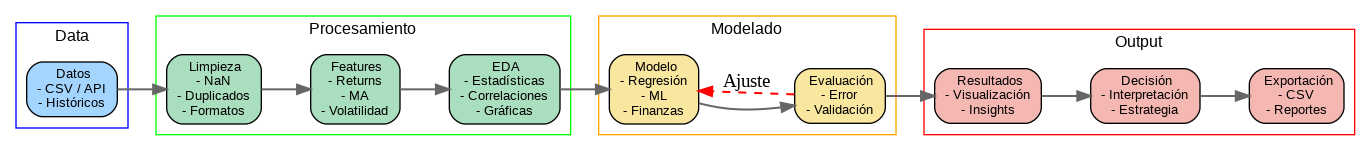

# ***DATOS: SU RECOPILACIÓN Y JUSTIFICACIÓN***

In [ ]:
import yfinance as yf #imortaremos directamente los dato
import pandas as pd
from google.colab import files
import statsmodels.api as SM
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Descargaremos directamente de Yahoo FInance los precio de cierres mensuales de 1990 a la fecha:

In [ ]:
# 1. Configuración de parámetros
start_date = "1990-01-02"
end_date = "2026-01-01" # Max fecha registrada cercana
tickers = ["^GSPC", "^VIX"]

# Descarga masiva
df_mercado = yf.download(tickers, start=start_date, end=end_date, interval="1mo")

# Limpieza y Selección
# Nos quedamos solo con 'Close' para manejar dividendos y splits correctamente, ya que 'Adj Close' no se devuelve con auto_adjust=True
df_limpio = df_mercado['Close']

# Renombramos para que sea fácil de leer
df_limpio.columns = ['S&P500', 'VIX']

# Guardar a CSV para usarlo en tu Pipeline
df_limpio.to_csv("datos_mercado_1976_2024.csv")
df_limpio.head() #funciona


/tmp/ipython-input-3231683610.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_mercado = yf.download(tickers, start=start_date, end=end_date, interval="1mo")
[*********************100%***********************]  2 of 2 completed


,S&P500,VIX
Date,,
1990-01-01,NaN,25.360001
1990-02-01,331.890015,21.990000
1990-03-01,339.940002,19.730000
1990-04-01,330.799988,19.520000
1990-05-01,361.230011,17.370001


Descargaremos la base de la FRED 10Y-2Y al notebook y adjuntaremos al dtframe actual:

In [ ]:
dt = files.upload()
fred_1oY2Y = pd.read_csv('T10-Y2Y.csv')
fred_1oY2Y.head()
#

Saving T10-Y2Y.csv to T10-Y2Y.csv


,observation_date,T10Y2Y
0,1990-01-01,0.12
1,1990-02-01,0.10
2,1990-03-01,-0.04
3,1990-04-01,0.06
4,1990-05-01,0.12


ADJUNTAMOS LO DATOS POR FECHA Y PROCEDERIAMOS AL EDA...


In [ ]:
fred_1oY2Y['observation_date'] = pd.to_datetime(fred_1oY2Y['observation_date']) #lo transfromamos
fred_1oY2Y = fred_1oY2Y.set_index('observation_date') #Transformamos a index la fecha

#arreglamos los index de cada dtframe para que sean iguales y solo aplicar merge()
df_limpio.index.name = 'Date'
fred_1oY2Y.index.name = 'Date'
df_final = pd.merge(df_limpio, fred_1oY2Y, left_index=True, right_index=True, how='outer')
df_modelo = df_final.dropna() # eliminamos los excedentes de dias feriados o pausas de gobierno, etc
df_modelo.tail()

,S&P500,VIX,T10Y2Y
Date,,,
2025-08-01,6460.259766,15.360000,0.56
2025-09-01,6688.459961,16.280001,0.55
2025-10-01,6840.200195,17.440001,0.54
2025-11-01,6849.089844,16.350000,0.54
2025-12-01,6845.500000,14.950000,0.64


PROCEDEMOS CON EL ANALISIS EDA Y AGREGAMOS COLUMNAS DE CAMBIO PORCENTUAL


In [ ]:
df_modelo.info() #Ya no poseemos Nulls debido al Dropna aplicado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431 entries, 1990-02-01 to 2025-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S&P500  431 non-null    float64
 1   VIX     431 non-null    float64
 2   T10Y2Y  431 non-null    float64
dtypes: float64(3)
memory usage: 13.5 KB


AGREGAMOS LAS COLUMNAS DE CAMBIO PORCENTUAL MENSUAL PARA ANALISAR LOS CAMBIOS

In [ ]:
df_modelo['SP500%'] = df_modelo['S&P500'].pct_change()
df_modelo['VIX%'] = df_modelo['VIX'].pct_change()
df_modelo.tail()

/tmp/ipython-input-428643188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['SP500%'] = df_modelo['S&P500'].pct_change()
/tmp/ipython-input-428643188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['VIX%'] = df_modelo['VIX'].pct_change()


,S&P500,VIX,T10Y2Y,SP500%,VIX%
Date,,,,,
2025-08-01,6460.259766,15.360000,0.56,0.019066,-0.081340
2025-09-01,6688.459961,16.280001,0.55,0.035324,0.059896
2025-10-01,6840.200195,17.440001,0.54,0.022687,0.071253
2025-11-01,6849.089844,16.350000,0.54,0.001300,-0.062500
2025-12-01,6845.500000,14.950000,0.64,-0.000524,-0.085627


In [ ]:
#TENEMOS NULL DEBIDO A LA APLICACIÓN DE CAMBIO PORCENTUAL ELIMINAMOS LOS ELEMENTOS NA Y FILAS INECESARIAS
df_modelo = df_modelo.dropna()
df_modelo.drop(columns=['S&P500', 'VIX'], inplace=True)
df_modelo.tail()

,T10Y2Y,SP500%,VIX%
Date,,,
2025-08-01,0.56,0.019066,-0.081340
2025-09-01,0.55,0.035324,0.059896
2025-10-01,0.54,0.022687,0.071253
2025-11-01,0.54,0.001300,-0.062500
2025-12-01,0.64,-0.000524,-0.085627


MATRIX DE CORRELACIÓN

          T10Y2Y    SP500%      VIX%
T10Y2Y  1.000000 -0.038579 -0.031187
SP500% -0.038579  1.000000 -0.663984
VIX%   -0.031187 -0.663984  1.000000


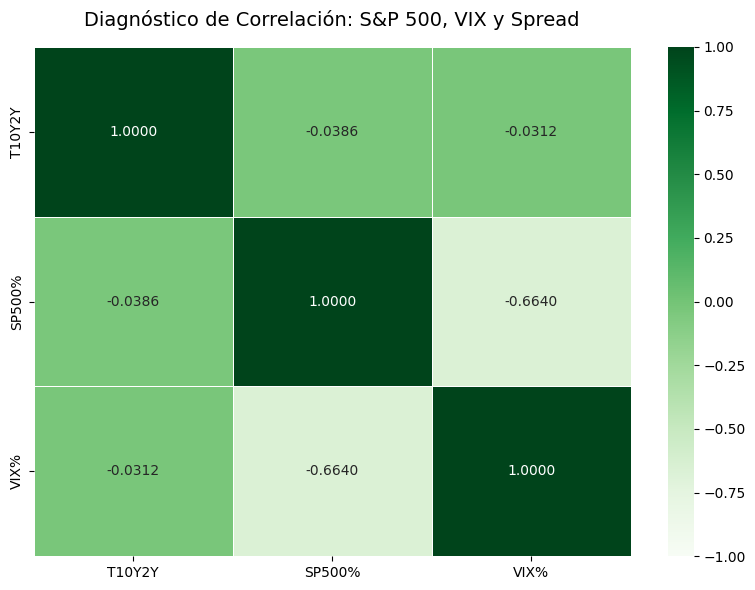

In [ ]:


matriz_corr = df_modelo.corr()
print(matriz_corr)

#Graficar el Mapa de Calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr,
            annot=True,
            cmap='Greens',
            fmt=".4f",
            vmin=-1, vmax=1,
            linewidths=0.5)

plt.title('Diagnóstico de Correlación: S&P 500, VIX y Spread', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

NOTAMOS UNA CORRELACIÓN NEGATIVA RELATIVAMENTE SIGNIFICATIVA MIENTRAS QUE EL DIFERENCIAL NO PRESETA CORRELACIONES DIRECTAS

### Análisis de dataset
*   ¿De dónde viene?: Los datos vienen de yahoo finance y de el sistema de datos FRED de la reserva federal de Estados Unidos.
*   ¿Qué contiene?: Los datos contiene tres elementos: el precio spot del S&P500, el vix (índice de volatilidad), y el Spread 10Y-2Y (que es la diferencia de tasas entre bonos de gobierno).
*   ¿Qué información dan las muestras?: La información que da son registros mensuales que van desde enero de 1990 hasta diciembre de 2025.
*   ¿Qué se quiere analizar?: Queremos ver si cuando el Spread se vuelve negativo, realmente podemos predecir si al S&P 500 le va a ir mal o si habrá una recesión.
*   ¿Qué variables se tienen que transformar para poder usarse en un modelo de regresión?: El vix y el S&P500 los convertimos en porcentajes, mientras que el spread y el vix los escalamos.
*   ¿Qué transformaciones se van a usar?: Usaremos cambios porcentuales, escalamiento, y en ciertas ocasiones *Lags*
*   ¿Qué resultado se podría encontrar al realizar una regresión?: Esperamos que usando las correlaciones que encontramos podamos explicar y predecir el comportamiento del mercado.

# **MODELO #1**
##Modelo "Base" -> La propuesta es mantener mantener una relación sencilla entre las variables y observar puntos de mejora para proximos cambios y ajustes
$$Retorno_{t} = \beta_0 + \beta_1 \text{Spread}_t + \beta_2 \text{VIX}_t + \epsilon$$

```
# This is formatted as code
```



### **SEPARAMOS NUESTRA NUESTRA DE ENTRENAMIENTO DE LA DE PRUEBA...**

In [ ]:
#SEPARAMOS LAS FILAS EN DOS MUESTRAS ALEATORIAS:
from sklearn.model_selection import train_test_split
x = df_modelo[['T10Y2Y', 'VIX%']]
y = df_modelo['SP500%']
train = train_test_split(x, y, test_size=0.10, shuffle=False) #No revolvemos - y trabajaremos con un 30% de testeo
X_train, X_test, y_train, y_test = train


NOMALIZAMOS Y ESCALAMOS LAS VARIABLES DE CONTROL (TRAIN)

In [ ]:
#Procedemos a escalar y normalizar los cambios porcentules (variables de control)..
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scalado = scaler.fit_transform(X_train[['T10Y2Y', 'VIX%']])
X_escalado_df = pd.DataFrame(X_scalado, columns= ['T10Y2Y', 'VIX%'], index = y_train.index )
print(X_escalado_df.head())


X_scalado_test = scaler.fit_transform(X_test[['T10Y2Y', 'VIX%']])
X_test= pd.DataFrame(X_scalado_test, columns= ['T10Y2Y', 'VIX%'], index = y_test.index )
print(X_test.head())


              T10Y2Y      VIX%
Date                          
1990-03-01 -1.375186 -0.563516
1990-04-01 -1.258816 -0.145963
1990-05-01 -1.188994 -0.596916
1990-06-01 -1.177356 -0.585647
1990-07-01 -0.967890  1.542642
              T10Y2Y      VIX%
Date                          
2022-06-01  0.626177  0.528366
2022-07-01  0.002998 -1.475830
2022-08-01 -0.448269  1.190010
2022-09-01 -0.426780  1.243448
2022-10-01 -0.534225 -1.047374


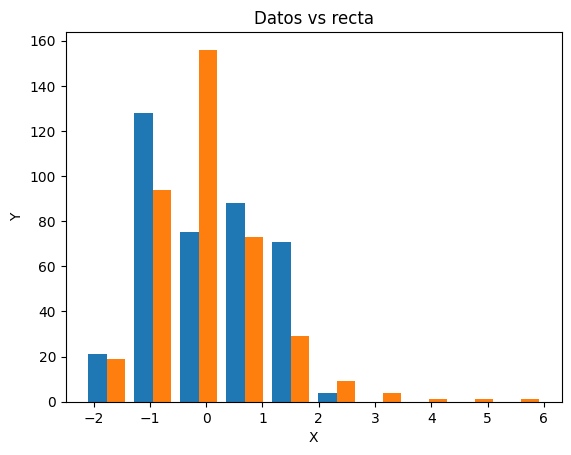

In [ ]:
#GRAFICAMOS LA NUEVA DITRIBUCIÓN DE NUESTROS DATOS
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(X_escalado_df)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos vs recta")

plt.show()

### ENTRENAMIENTO DE MODELO

In [ ]:
X = SM.add_constant(X_escalado_df) #CONCADENAR
model = SM.OLS(y_train,X) #MODELO MINIMOS CUADRADOS ORDINARIOS
results = model.fit() #OPTIMIZA
print(results.summary())#RESUME
R2_1 = results.rsquared #Guardo el R2 del modelo 1
R2_1

                            OLS Regression Results                            
Dep. Variable:                 SP500%   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           8.86e-49
Time:                        19:08:10   Log-Likelihood:                 787.80
No. Observations:                 387   AIC:                            -1570.
Df Residuals:                     384   BIC:                            -1558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.002      4.612      0.0

np.float64(0.43801425299062136)

TRABAJAMOS CON LA MUESTRA (TEST)

In [ ]:
Y_prediccion = results.predict(SM.add_constant(X_test[['T10Y2Y', 'VIX%']]))
R2_1T = r2_score(y_test, Y_prediccion)
R2_1T

0.5106429957555285

POSEEMOS LIGERA CORRRELACIÓN NEGATIVA ENTRE VIX/SPREAD CON EL MERCADO, AHORA INTENTAREMOS BUSCAR ALGUNA MEJORA CON PENALIZACIONES. SIN EMBARGO LO MÁS NOTORIO ES EL COEFICIENTE DE RSQUARED LO CUAL (EN EL CONTEXTO DE LA BOLSA DE VALORES) .44 YA ES SIGNIFICATIVO ; OJO tembién tenemos pvalues cercanos a 0.

## MODELO1_LASSO -> INTENTAREMOS JUGAR CON LAS PENALIZACIONES

In [ ]:
lasso = Lasso(alpha = 1)
lasso.fit(X_escalado_df,y_train)
print(f'intercepto: {lasso.intercept_}, coeficientes: {lasso.coef_}')
train_score_ls =lasso.score(X_escalado_df,y_train)
test_score_ls =lasso.score(X_test,y_test)
print(f"Train score: {train_score_ls}")
print(f"Test score: {test_score_ls}")

intercepto: 0.007436404507058309, coeficientes: [-0. -0.]
Train score: 0.0
Test score: -0.01475619607468115


Peor desempeño de los tres modelos

## MODELO1_RIDGE

In [ ]:
ridgeReg = Ridge(alpha=.05)
ridgeReg.fit(X_escalado_df,y_train)
print(f'intercepto: {ridgeReg.intercept_}, coeficientes: {ridgeReg.coef_}')
train_score_ridge = ridgeReg.score(X_escalado_df, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)
print(f"Train score: {train_score_ridge}")
print(f"Test score: {test_score_ridge}")

intercepto: 0.007436404507058309, coeficientes: [-0.0024783  -0.02791142]
Train score: 0.4380142455274778
Test score: 0.5106285295590166


Resultados casí exactos a la regresion sin penalizaciones

## MODELO1_ELASTIC_NET L1 y L2


In [ ]:
## MODELO_ELASTIC_NET
elasticRed = ElasticNet(alpha=0.001)
elasticRed.fit(X_escalado_df,y_train)
print(f'intercepto: {elasticRed.intercept_}, coeficientes: {elasticRed.coef_}')

train_score_elastic = elasticRed.score(X_escalado_df, y_train)
test_score_elastic = elasticRed.score(X_test, y_test)
print(f"Train score: {train_score_elastic}")
print(f"Test score: {test_score_elastic}")

intercepto: 0.007436404507058309, coeficientes: [-0.00195    -0.02737415]
Train score: 0.4377087756577246
Test score: 0.5093899560848414


## MODELO 1 CONCLUSIÓN:
Parece ser que la relación directa de 10Y-2Y +  VIX  tiene una ligera la capacidad de predicir fluctuacions o cambios en el mercado,teniendo un rendimiento similar (excepto lasso) despúes de aplicar penalizaciones  lo cual nos habla de la necesidad de cambiar de paradigma, pero no negamos la correlación que existe entre estas variables, ya tenemos algo mejor que la media



---



# MODELO #2
## Modelo "Experimento" intentaremos jugar con desfaces temporales para buscar relaciones significativas entre intervalos temporales y encontrar alguna relación de nuestros indicadores con el mercado y tal vez purgar lo que no sirva

$$Retorno_{t} = \beta_0 + \beta_1 \text{Spread}_t + \beta_2 \text{VIX}_t + \beta_3Spread_lag + \beta_4VIX_lag + \epsilon$$


Posterior a adecuar nuestro dataframe, buscaremos correlaciones usando variables de lag temporal:

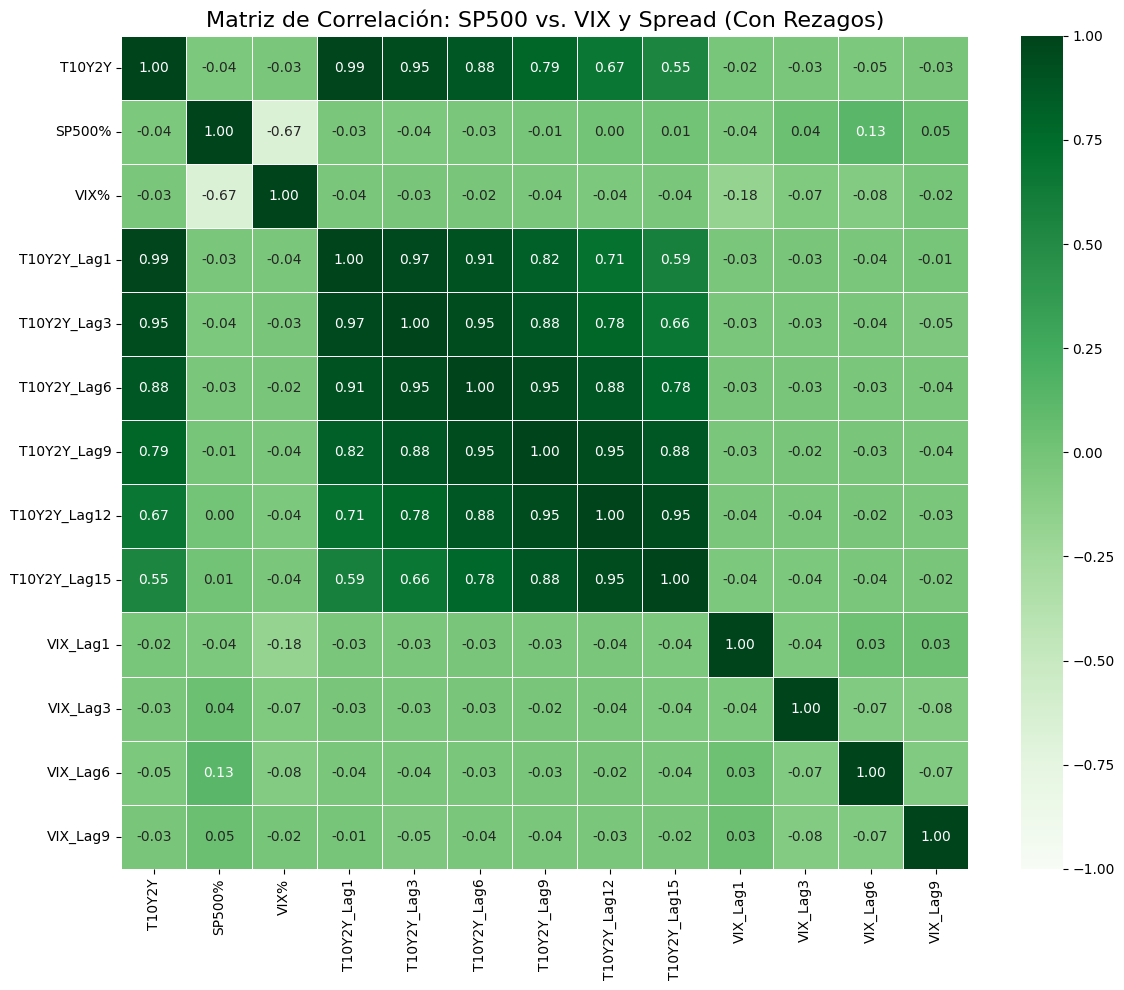

In [ ]:

#meses de desplazamiento:
df_analisis = df_modelo.copy()
df_analisis['T10Y2Y_Lag1'] = df_analisis['T10Y2Y'].shift(1)
df_analisis['T10Y2Y_Lag3'] = df_analisis['T10Y2Y'].shift(3)
df_analisis['T10Y2Y_Lag6'] = df_analisis['T10Y2Y'].shift(6)
df_analisis['T10Y2Y_Lag9'] = df_analisis['T10Y2Y'].shift(9)
df_analisis['T10Y2Y_Lag12'] = df_analisis['T10Y2Y'].shift(12)
df_analisis['T10Y2Y_Lag15'] = df_analisis['T10Y2Y'].shift(15)

df_analisis['VIX_Lag1'] = df_analisis['VIX%'].shift(1)
df_analisis['VIX_Lag3'] = df_analisis['VIX%'].shift(3)
df_analisis['VIX_Lag6'] = df_analisis['VIX%'].shift(6)
df_analisis['VIX_Lag9'] = df_analisis['VIX%'].shift(9)

#Los lags generan NaNs al principio de la tabla
df_analisis = df_analisis.dropna()

#CALCULAR MATRIZ DE CORRELACIÓN
matriz_lags = df_analisis.corr()

# 5. VISUALIZAR EL HEATMAP (Enfocado en predecir el SP500)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_lags,
            annot=True,
            cmap='Greens',
            fmt=".2f",
            vmin=-1, vmax=1,
            linewidths=0.5)

plt.title('Matriz de Correlación: SP500 vs. VIX y Spread (Con Rezagos)', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#lo que nos importa...
correlaciones_target = matriz_lags['SP500%'].sort_values(ascending=True)
print(correlaciones_target)

VIX%           -0.666817
T10Y2Y_Lag3    -0.043998
T10Y2Y         -0.039711
VIX_Lag1       -0.039610
T10Y2Y_Lag1    -0.034602
T10Y2Y_Lag6    -0.031758
T10Y2Y_Lag9    -0.011869
T10Y2Y_Lag12    0.000003
T10Y2Y_Lag15    0.012026
VIX_Lag3        0.041554
VIX_Lag9        0.052428
VIX_Lag6        0.127030
SP500%          1.000000
Name: SP500%, dtype: float64


OBSERVACIONES: EL vix con lag 6 meses posee una correlación positiva relativamente alta a diferencia de el vix sincronico e incluso que vix a 9 meses de lag, será interesante agregar esta variable al modelo, además que obtuvimos una ligera mejora dentro de la correlación con el T10Y2Y a 3 meses también deberíamos agregarlo al modelo. Aunque aun no eliminaremos las variables ya consideradas en el modelo 1, aunque idealmente el modelo debe predecir posibles comportamientos por lo que no debería depender de variables actuales sobre todo considerando el VIX, es más sencillo conseguir previsiones acertadas por parte de la FED sobre tasas.

###PROCEDEMOS A ARREGLAR EL DATAFRMAE CON LAS NUESVAS VARIABLES

In [ ]:
#Incorporar a modelo Vix_Lag6, vix%, T10Y2Y, T10Y2Y_Lag15
df_modelo_2 = df_modelo
df_modelo_2['VIX_Lag6'] = df_modelo['VIX%'].shift(6)
df_modelo_2['T10Y2Y_Lag15'] = df_modelo['T10Y2Y'].shift(15)
df_modelo_2 = df_modelo_2.dropna()
df_modelo_2.tail()


,T10Y2Y,SP500%,VIX%,VIX_Lag6,T10Y2Y_Lag15
Date,,,,,
2025-08-01,0.56,0.019066,-0.081340,0.194766,-0.37
2025-09-01,0.55,0.035324,0.059896,0.134998,-0.43
2025-10-01,0.54,0.022687,0.071253,0.108618,-0.25
2025-11-01,0.54,0.001300,-0.062500,-0.248178,-0.09
2025-12-01,0.64,-0.000524,-0.085627,-0.099085,0.10


PRODECEDMOS CON EL SPLIT DE DATOS PARA ENTRENAR Y TESTEAR


In [ ]:
x = df_modelo_2[['T10Y2Y', 'VIX%','T10Y2Y_Lag15','VIX_Lag6' ]]
y = df_modelo_2['SP500%']
train = train_test_split(x, y, test_size=0.30, shuffle=False) #No revolvemos - y trabajaremos con un 30% de testeo
X_train_2, X_test_2, y_train_2, y_test_2 = train
X_train_2.head()


,T10Y2Y,VIX%,T10Y2Y_Lag15,VIX_Lag6
Date,,,,
1991-06-01,1.33,0.227244,-0.04,0.190433
1991-07-01,1.36,-0.223529,0.06,-0.207354
1991-08-01,1.47,-0.047431,0.12,0.015304
1991-09-01,1.47,0.096127,0.13,-0.204899
1991-10-01,1.62,-0.023344,0.31,0.080569


Escalamos POR SEPARADO train y test

In [ ]:
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler refers to the class
#TRAIN
scaler = StandardScaler()
X_escalado_2 = scaler.fit_transform(X_train_2[['T10Y2Y', 'VIX%','T10Y2Y_Lag15','VIX_Lag6']])
X_escalado_df_2 = pd.DataFrame(X_escalado_2,columns= ['T10Y2Y', 'VIX%', 'T10Y2Y_Lag15','VIX_Lag6'], index = y_train_2.index)
print(X_escalado_df_2.head())
#TEST
X_test_2_esc = scaler.fit_transform(X_test_2[['T10Y2Y', 'VIX%','T10Y2Y_Lag15','VIX_Lag6']])
X_test_2_esc = pd.DataFrame(X_test_2_esc,columns= ['T10Y2Y', 'VIX%', 'T10Y2Y_Lag15','VIX_Lag6'], index = y_test_2.index)
print(X_test_2_esc.head())

              T10Y2Y      VIX%  T10Y2Y_Lag15  VIX_Lag6
Date                                                  
1991-06-01  0.047774  1.128919     -1.374010  0.942135
1991-07-01  0.080450 -1.270639     -1.265867 -1.199556
1991-08-01  0.200261 -0.333231     -1.200981 -0.000764
1991-09-01  0.200261  0.430958     -1.190167 -1.186336
1991-10-01  0.363640 -0.205011     -0.995510  0.350624
              T10Y2Y      VIX%  T10Y2Y_Lag15  VIX_Lag6
Date                                                  
2015-08-01  1.746051  4.795319      2.152817 -1.416491
2015-09-01  1.729361 -0.626031      2.125700  0.412013
2015-10-01  1.679291 -1.527177      1.976553 -0.285554
2015-11-01  1.595840  0.135956      1.854523 -0.286987
2015-12-01  1.395559  0.350092      1.881641  1.025134


In [ ]:
X_escalado_df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1991-06-01 to 2015-07-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T10Y2Y        290 non-null    float64
 1   VIX%          290 non-null    float64
 2   T10Y2Y_Lag15  290 non-null    float64
 3   VIX_Lag6      290 non-null    float64
dtypes: float64(4)
memory usage: 11.3 KB


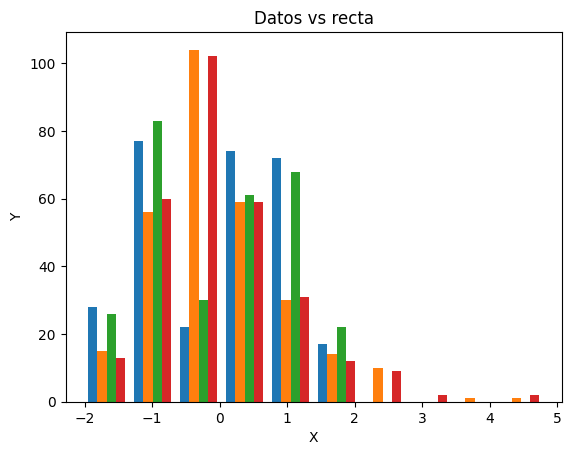

In [ ]:
#Grafico la ditrubución...
plt.hist(X_escalado_df_2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos vs recta")

plt.show()

ENTRENAMOS EL MODELO Y COMPROBAMOS EN TEST



In [ ]:
X = SM.add_constant(X_escalado_df_2) #CONCADENAR
model2 = SM.OLS(y_train_2,X) #MODELO MINIMOS CUADRADOS ORDINARIOS
results2 = model2.fit() #OPTIMIZA
print(results2.summary())#RESUME
R2_2 = results.rsquared #Guardo el R2 del modelo 1
R2_2

                            OLS Regression Results                            
Dep. Variable:                 SP500%   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           6.53e-35
Time:                        19:36:28   Log-Likelihood:                 595.59
No. Observations:                 290   AIC:                            -1181.
Df Residuals:                     285   BIC:                            -1163.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0067      0.002      3.647   

np.float64(0.43801425299062136)

OBTUVIMOS UN BUEN DESEMPEÑO CON P VALUES ADECUADOS CON EXCEPCIÓN DE VIX_LAG6 QUE CARECE DE SIGNIFICANCIA ESTADÍSTICA ESTO DEBERÍA DE ADECUARSE POSTERIORMENTE

In [ ]:
#COMPROBAMOS CON TEST

In [ ]:
Y_prediccion_2 = results2.predict(SM.add_constant(X_test_2_esc))
R2_2T = r2_score(y_test_2, Y_prediccion_2)
R2_2T

0.45335299146892194

## MODELO2_LASSO -> INTENTAREMOS JUGAR CON LAS PENALIZACIONES

In [ ]:
lasso_2 = Lasso(alpha = 10)
lasso_2.fit(X_escalado_df_2,y_train_2)
print(f'intercepto: {lasso_2.intercept_}, coeficientes: {lasso_2.coef_}')
train_score_ls2 =lasso_2.score(X_escalado_df_2,y_train_2)
test_score_ls2 =lasso_2.score(X_test_2_esc,y_test_2)
print(f"Train score: {train_score_ls2}")
print(f"Test score: {test_score_ls2}")

intercepto: 0.00670371056056145, coeficientes: [-0. -0.  0.  0.]
Train score: 0.0
Test score: -0.007315563790133206


Las penalizaciones rudas como Lasso nos siguen dando coeficientes 0

## MODELO2_RIDGE:


In [ ]:
ridge_2 = Ridge(alpha = 1)
ridge_2.fit(X_escalado_df_2,y_train_2)
print(f'intercepto: {ridge_2.intercept_}, coeficientes: {ridge_2.coef_}')
train_score_ridge2 = ridge_2.score(X_escalado_df_2,y_train_2)
test_score_ridge2 = ridge_2.score(X_test_2_esc,y_test_2)
print(f"Train score: {train_score_ridge2}")
print(f"Test score: {test_score_ridge2}")


intercepto: 0.00670371056056145, coeficientes: [-0.0048506  -0.02671931  0.00488579  0.0023351 ]
Train score: 0.4409640635964508
Test score: 0.4533561387688637


## MODELO2_ELASTICNET

In [ ]:
## MODELO_ELASTIC_NET
elasticRed2 = ElasticNet(alpha=3)
elasticRed2.fit(X_escalado_df_2,y_train_2)
print(f'intercepto: {elasticRed2.intercept_}, coeficientes: {elasticRed2.coef_}')

train_score_elastic2 = elasticRed2.score(X_escalado_df_2, y_train_2)
test_score_elastic2 = elasticRed2.score(X_test_2_esc, y_test_2)
print(f"Train score: {train_score_elastic2}")
print(f"Test score: {test_score_elastic2}")

intercepto: 0.00670371056056145, coeficientes: [-0. -0.  0.  0.]
Train score: 0.0
Test score: -0.007315563790133206


Comparemos las metricas recabadas

El modelo base demostró una fuerte relación estructural, logrando un $R^2$ de 0.43 con alta significancia estadística. Esto valida la selección de nuestras variables (VIX y T10Y2Y), y esta metrica se mantiene aún al incorporar varibles con desfase. Sin embargo, como tal no tenemos un modelo predictivo, por ello, se adaptará hacia un modelo estrictamente predictivo usando variables rezagadas (Lags).En este proximo modelo el $R^2$ disminuirá, pero ganaremos la capacidad  de pronosticar el  (Out-of-Sample), aunque se puede debatir sobre excluir diferecnial de tasas sincronica ya que esas estimaciones si se obtienen de forma fiable.

# MODELO3: CAPACIDAD PREDICTORIA

Intentaremos cambiar de paradigma, trataremos de explorar las relaciones entre variables con lags, eliminando VIX%

In [ ]:
#Incorporar a modelo Vix_Lag6, vix%, T10Y2Y, T10Y2Y_Lag15
df_modelo_3 = df_modelo
df_modelo_3 = df_modelo_3.drop(columns=['VIX%'])
df_modelo_3['VIX_Lag6'] = df_modelo['VIX%'].shift(6)
df_modelo_3['T10Y2Y_Lag15'] = df_modelo['T10Y2Y'].shift(15)
df_modelo_3 = df_modelo_3.dropna()
df_modelo_3.tail()


,T10Y2Y,SP500%,VIX_Lag6,T10Y2Y_Lag15
Date,,,,
2025-08-01,0.56,0.019066,0.194766,-0.37
2025-09-01,0.55,0.035324,0.134998,-0.43
2025-10-01,0.54,0.022687,0.108618,-0.25
2025-11-01,0.54,0.001300,-0.248178,-0.09
2025-12-01,0.64,-0.000524,-0.099085,0.10


ESCALAMOS Y SPLITEAMOS LA MUESTRA EN TRAIN Y TEST

In [ ]:
x = df_modelo_3[['T10Y2Y','T10Y2Y_Lag15','VIX_Lag6' ]]
y = df_modelo_3['SP500%']
train = train_test_split(x, y, test_size=0.30, shuffle=False) #No revolvemos - y trabajaremos con un 30% de testeo
X_train_3, X_test_3, y_train_3, y_test_3 = train

scaler = StandardScaler()
X_escalado_3 = scaler.fit_transform(X_train_3[['T10Y2Y','T10Y2Y_Lag15','VIX_Lag6']])
X_escalado_df_3 = pd.DataFrame(X_escalado_3,columns= ['T10Y2Y', 'T10Y2Y_Lag15','VIX_Lag6'], index = y_train_3.index)
print(X_escalado_df_3.head())
#TEST
X_test_3_esc = scaler.fit_transform(X_test_3[['T10Y2Y','T10Y2Y_Lag15','VIX_Lag6']])
X_test_3_esc = pd.DataFrame(X_test_3_esc,columns= ['T10Y2Y', 'T10Y2Y_Lag15','VIX_Lag6'], index = y_test_3.index)
print(X_test_3_esc.head())

              T10Y2Y  T10Y2Y_Lag15  VIX_Lag6
Date                                        
1991-06-01  0.047774     -1.374010  0.942135
1991-07-01  0.080450     -1.265867 -1.199556
1991-08-01  0.200261     -1.200981 -0.000764
1991-09-01  0.200261     -1.190167 -1.186336
1991-10-01  0.363640     -0.995510  0.350624
              T10Y2Y  T10Y2Y_Lag15  VIX_Lag6
Date                                        
2015-08-01  1.746051      2.152817 -1.416491
2015-09-01  1.729361      2.125700  0.412013
2015-10-01  1.679291      1.976553 -0.285554
2015-11-01  1.595840      1.854523 -0.286987
2015-12-01  1.395559      1.881641  1.025134


In [ ]:
X = SM.add_constant(X_escalado_df_3) #CONCADENAR
model3 = SM.OLS(y_train_3,X) #MODELO MINIMOS CUADRADOS ORDINARIOS
results3 = model3.fit() #OPTIMIZA
print(results3.summary())#RESUME
R2_3 = results3.rsquared #Guardo el R2 del modelo 1
R2_3

                            OLS Regression Results                            
Dep. Variable:                 SP500%   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.613
Date:                Mon, 23 Feb 2026   Prob (F-statistic):             0.0516
Time:                        19:36:49   Log-Likelihood:                 515.19
No. Observations:                 290   AIC:                            -1022.
Df Residuals:                     286   BIC:                            -1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0067      0.002      2.769   

np.float64(0.0266730917777237)

In [ ]:
Y_prediccion_3 = results3.predict(SM.add_constant(X_test_3_esc))
R2_3T = r2_score(y_test_3, Y_prediccion_3)
R2_3T

-0.05321486383046192

TENEMOS PÉSIMOS RESULTADOS AL ELIMINAR VIX%, PARECE SER QUE EL SPREAD y LOS LAGS NO TIENEN PODER PREDICTORIO POR SI SOLOS. Además tenemos P Values  elevados por parte de VIX_lag6 y T10Y2Y.

CONTINUAMOS CON LASSO

In [ ]:
lasso_3 = Lasso(alpha = .05)
lasso_3.fit(X_escalado_df_3,y_train_3)
print(f'intercepto: {lasso_3.intercept_}, coeficientes: {lasso_3.coef_}')
train_score_ls3 =lasso_3.score(X_escalado_df_3,y_train_3)
test_score_ls3 =lasso_3.score(X_test_3_esc,y_test_3)
print(f"Train score: {train_score_ls3}")
print(f"Test score: {test_score_ls3}")

intercepto: 0.00670371056056145, coeficientes: [-0.  0.  0.]
Train score: 0.0
Test score: -0.007315563790133206


RIDGE

In [ ]:
ridge_3 = Ridge(alpha = 1)
ridge_3.fit(X_escalado_df_3,y_train_3)
print(f'intercepto: {ridge_3.intercept_}, coeficientes: {ridge_3.coef_}')
train_score_ridge3 = ridge_3.score(X_escalado_df_3,y_train_3)
test_score_ridge3 =ridge_3.score(X_test_3_esc,y_test_3)
print(f"Train score: {train_score_ridge3}")
print(f"Test score: {test_score_ridge3}")


intercepto: 0.00670371056056145, coeficientes: [-0.00442194  0.00644331  0.00376819]
Train score: 0.026672151570672376
Test score: -0.0526871636903139


ELASTICNET

In [ ]:
## MODELO_ELASTIC_NET
elasticRed3 = ElasticNet(alpha=3)
elasticRed3.fit(X_escalado_df_3,y_train_3)
print(f'intercepto: {elasticRed3.intercept_}, coeficientes: {elasticRed3.coef_}')

train_score_elastic3 = elasticRed3.score(X_escalado_df_3, y_train_3)
test_score_elastic3 = elasticRed3.score(X_test_3_esc, y_test_3)
print(f"Train score: {train_score_elastic3}")
print(f"Test score: {test_score_elastic3}")

intercepto: 0.00670371056056145, coeficientes: [-0.  0.  0.]
Train score: 0.0
Test score: -0.007315563790133206


Desde este enfoque OLS y sus varientes con penalizaciones tiene la posbilidad de describir el mercado, sin embargo, tiene nulas capacidades para predecir. Un entorno tan variable trae problemas a modelos con penalización rigida como Lasso, penaliza demasiados elementos para el tipo de solución que requerimos. Puede ser que el timeframe sea el problema dentro de la relación diferencial de tasas - mercado. Aunque parece haber antecedentes de modelos donde aplican regresiones con estos elementos, los intervalos son más amplios y aplican logartimicos;  osea herramientas que no poseemos. NO hay que desechar los resultados en los modelos anteriores, especificamente el modelo 1, sin poseer ruido incesario y con buena validación estadística tenemos un modelo que describe signifcativamente el mercado en condiciones especificas (VIX, SPREAD).

In [ ]:
model_comparison = {
    'Model': [
        'Modelo 1 OLS',
        'Modelo 1 Lasso',
        'Modelo 1 Ridge',
        'Modelo 1 ElasticNet',
        'Modelo 2 OLS',
        'Modelo 2 Lasso',
        'Modelo 2 Ridge',
        'Modelo 2 ElasticNet',
        'Modelo 3 OLS',
        'Modelo 3 Lasso',
        'Modelo 3 Ridge',
        'Modelo 3 ElasticNet'
    ],
    'Train Score (R2)': [
        R2_1,
        train_score_ls,
        train_score_ridge,
        train_score_elastic,
        R2_2,
        train_score_ls2,
        train_score_ridge2,
        train_score_elastic2,
        R2_3,
        train_score_ls3,
        train_score_ridge3,
        train_score_elastic3
    ],
    'Test Score (R2)': [
        R2_1T,
        test_score_ls,
        test_score_ridge,
        test_score_elastic,
        R2_2T,
        test_score_ls2,
        test_score_ridge2,
        test_score_elastic2,
        R2_3T,
        test_score_ls3,
        test_score_ridge3,
        test_score_elastic3
    ]
}

df_model_comparison = pd.DataFrame(model_comparison)
print(df_model_comparison)

                  Model  Train Score (R2)  Test Score (R2)
0          Modelo 1 OLS          0.438014         0.510643
1        Modelo 1 Lasso          0.000000        -0.014756
2        Modelo 1 Ridge          0.438014         0.510629
3   Modelo 1 ElasticNet          0.437709         0.509390
4          Modelo 2 OLS          0.438014         0.453353
5        Modelo 2 Lasso          0.000000        -0.007316
6        Modelo 2 Ridge          0.440964         0.453356
7   Modelo 2 ElasticNet          0.000000        -0.007316
8          Modelo 3 OLS          0.026673        -0.053215
9        Modelo 3 Lasso          0.000000        -0.007316
10       Modelo 3 Ridge          0.026672        -0.052687
11  Modelo 3 ElasticNet          0.000000        -0.007316




---



## Ajuste de modelos con comparaciones de R2. (Visualizaciones) (Gráficos de barras)

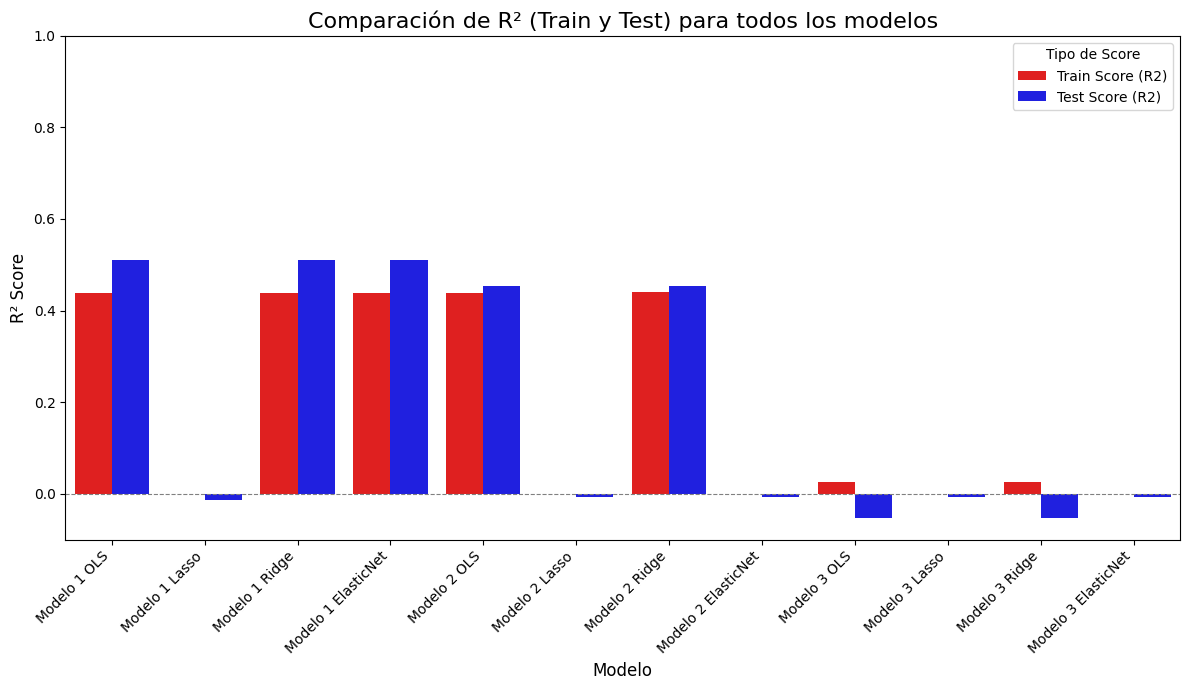

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para la visualización
df_melted = df_model_comparison.melt(id_vars=['Model'], var_name='Metric', value_name='R2 Score')

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='R2 Score', hue='Metric', data=df_melted, palette={'Train Score (R2)': 'red', 'Test Score (R2)': 'blue'})

plt.title('Comparación de R² (Train y Test) para todos los modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.1, 1) # Asegurarse de que el eje Y comience en un valor razonable para R2
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Tipo de Score')
plt.tight_layout()
plt.show()

Aqui es claro como es que los modelos explicativos superan a los modelos predictivos, simplemente los modelos de regresión lineal no son optimos para este tipo de problemas donde incluso la media se desempeña mejor.

# Conclusión


Se logró determinar la capacidad explicativa de los factores VIX y Spread sobre el precio del S&P500. Mientras que se logró demostrar que usando estas variables se puede describir como se ve el comportamiento del mercado, se llegó a la conclusión que no se pueden usar para predecir el comportamiento futuro.

También se logró construir un dataset muy completo donde se pudieron integrar datos de la Reserva Federal de los Estados Unidos, al igual que de yahoo finance. Se cumplió el objetivo de identificar las dinámicas entre el mercado de bonos comparado con el mercado de renta variable, confirmando una correlación negativa entre el VIX y el S&P500.

Al evaluar los tres modelos propuestos, se llegó a la conclusión de que una regresión lineal simple es la mejor manera de describir el comportamiento del mercado, logrando describir aproximadamente un 43% de la variabilidad en los precios. Por otro lado, se llegó a la conclusión que en este caso, Lasso es un modelo sumamente restrictivo, por lo que no pudo explicar ni predecir el comportamiento del mercado, en cambio usando el modelo de Ridge se logró mantener el Spread como predictor del mercado, logrando mejores resultados.

Mediante el uso de métricas de error y de niveles de significancia, se logró confirmar que el Spread es una variable muy importante para identificar zonas de riesgo en el mercado, esto a pesar de no funcionar de manera acertada como un predictor.

Finalmente, se logró demostrar que el lograr identificar una discrepancia entre las tasas de los bonos entre corto y largo plazo es un gran indicador que logra explicar algunos cambios de tendencia en el mercado.


## Referencias

Aroussi, R. (2023). yfinance: Yahoo! Finance market data downloader (Versión 0.2.36) [Software de computación]. https://pypi.org/project/yfinance/

INvestopedia. (2025, 21 mayo). Credit Spread: What It Means for Bonds and Options Strategy. Investopedia. https://www.investopedia.com/terms/c/creditspread.asp

Kenton, W. (2025, 20 noviembre). S&P 500 Index: What It’s for and Why It’s Important in Investing. Investopedia. https://www.investopedia.com/terms/s/sp500.asp


Yahoo. (s.f.). CBOE Volatility Index (^VIX) Historical Data [Conjunto de datos]. Yahoo Finance. Recuperado el 18 de febrero de 2026, de https://finance.yahoo.com/quote/%5EVIX/history

Yahoo. (s.f.). S&P 500 (^GSPC) Historical Data [Conjunto de datos]. Yahoo Finance. Recuperado el 18 de febrero de 2026, de https://finance.yahoo.com/quote/%5EGSPC/history


